# B5S4 Árboles de Clasificación

- [8.1.2 Classification Trees](#8.1.2-Classification-Trees)
- [Lab: 8.3.1 Fitting Classification Trees](#8.3.1-Fitting-Classification-Trees)

In [1]:
#!pip install pydotplus

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydotplus
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

%matplotlib inline
plt.style.use('seaborn-white')



### 8.1.2 Classification Trees

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [61]:
#df2 = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
#Desde la red, se puede usar la ruta: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Heart.csv
filename = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Heart.csv'
df2 = pd.read_csv(filename)
df2.info()
#Una explicación de los datos está en: https://www.r-bloggers.com/2019/09/heart-disease-prediction-from-patient-data-in-r/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [62]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [63]:
df2.head(3)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes


In [64]:
#X2 = df2.drop('AHD', axis=1)
#Solo tomaremos dos variables a analizar
X2=df2[['Age','Chol']]
y2 = pd.factorize(df2.AHD)[0]

In [65]:
pd.DataFrame(y2).value_counts()

0    164
1    139
dtype: int64

In [66]:
y2

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [67]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=2)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=2, max_leaf_nodes=6)

In [68]:
clf.score(X2,y2)

0.6831683168316832

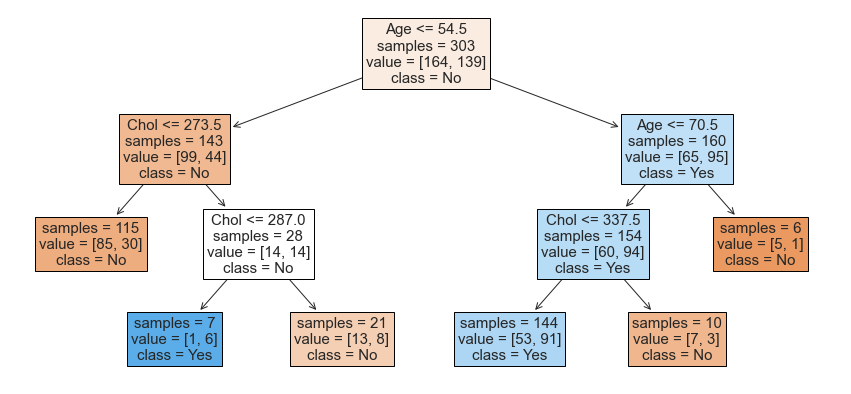

In [69]:
#graph2, = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
#Image(graph2.create_png())
fig, ax = plt.subplots(figsize=(15,7))
plot = plot_tree(
            decision_tree = clf,
            feature_names = X2.columns,
            class_names   = ['No','Yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 15,
            precision     = 2,
            ax            = ax
       )

In [70]:
texto_modelo = export_text(
                    decision_tree = clf,
                    feature_names = list(X2.columns)
               )
print(texto_modelo)

|--- Age <= 54.50
|   |--- Chol <= 273.50
|   |   |--- class: 0
|   |--- Chol >  273.50
|   |   |--- Chol <= 287.00
|   |   |   |--- class: 1
|   |   |--- Chol >  287.00
|   |   |   |--- class: 0
|--- Age >  54.50
|   |--- Age <= 70.50
|   |   |--- Chol <= 337.50
|   |   |   |--- class: 1
|   |   |--- Chol >  337.50
|   |   |   |--- class: 0
|   |--- Age >  70.50
|   |   |--- class: 0



In [71]:
y1=pd.Series(y2).map({0:'no',1:'yes'})

Text(70, 300, 'R6-No')

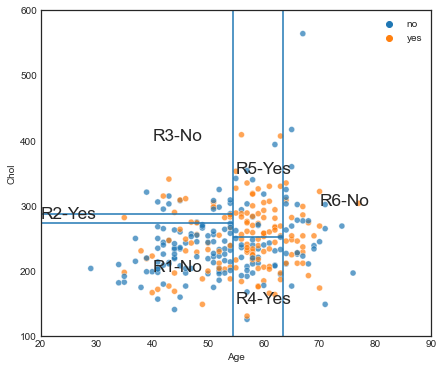

In [72]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
sns.scatterplot(data=X2,x='Age',y='Chol', hue=y1,alpha=0.7)
plt.xlim(20,90)
plt.ylim(100,600)
#plt.xticks([54.5, 63.5])
#plt.yticks([252.5,273.5, 287])
plt.vlines(54.50, ymin=100, ymax=600)
plt.hlines(287.0, xmin=20, xmax=54.50)
plt.hlines(273.5, xmin=20, xmax=54.50)
plt.vlines(63.5, ymin=100, ymax=600)
plt.hlines(252.50, xmin=54.50, xmax=63.5)
plt.annotate('R1-No', xy=(40,200), fontsize='xx-large')
plt.annotate('R2-Yes', xy=(20,280), fontsize='xx-large')
plt.annotate('R3-No', xy=(40,400), fontsize='xx-large')
plt.annotate('R4-Yes', xy=(55,150), fontsize='xx-large')
plt.annotate('R5-Yes', xy=(55,350), fontsize='xx-large');
plt.annotate('R6-No', xy=(70,300), fontsize='xx-large')

## Lab

### 8.3.1 Fitting Classification Trees

Datos del libro 'ISLR' en formato csv.

In [3]:
df3 = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df3.ShelveLoc

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

In [5]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0) #La variable High indica si hubo Ventas(Sales) altas
df3.ShelveLoc = df3.ShelveLoc.map({'Good':2, 'Medium':1,'Bad':0})


df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [6]:
df3.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [7]:
pd.crosstab(df3.High,df3.ShelveLoc)

ShelveLoc,0,1,2
High,,,
0,82,135,19
1,14,84,66


In [8]:
#X = df3.drop(['Sales', 'High'], axis=1)
#Haremos el análisis solo con tres variables: Price, Advertising y ShelveLoc
X = df3[['Price','Advertising','ShelveLoc']]
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [9]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [10]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       236
           1       0.77      0.68      0.72       164

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400



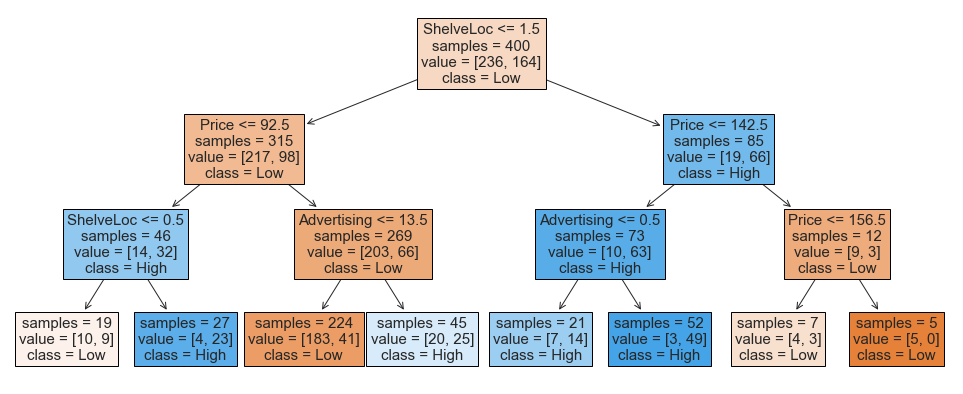

In [11]:
fig, ax = plt.subplots(figsize=(17,7))
plot = plot_tree(
            decision_tree = clf,
            feature_names = X.columns,
            class_names   = ['Low','High'],
            filled        = True,
            impurity      = False,
            fontsize      = 15,
            precision     = 2,
            ax            = ax
       )

In [12]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [13]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,109,49
Yes,9,33


In [14]:
(99+55)/(99+32+19+50)

0.77

In [15]:
# Precision of the model using test data is 77%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       118
           1       0.79      0.40      0.53        82

    accuracy                           0.71       200
   macro avg       0.74      0.66      0.66       200
weighted avg       0.73      0.71      0.68       200



### Podado del arbol 
Tomado de: https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

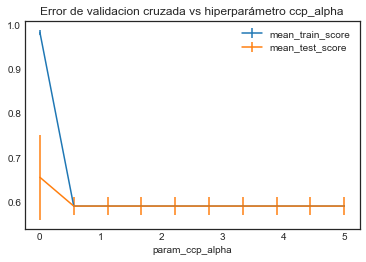

In [16]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [17]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [18]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 14
Número de nodos terminales: 75


In [19]:
# Error de test del modelo final
from sklearn.metrics import accuracy_score
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 71.0 %


In [20]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns.tolist(),
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Price,0.583641
1,Advertising,0.293820
2,ShelveLoc,0.122539


In [21]:
# Predicción de probabilidades
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict_proba(X = X_test)
predicciones[:5, :]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [22]:
# Clasificación empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(3)

,0,1,clasificacion_default_0.5
0,0.0,1.0,1
1,0.0,1.0,1
2,1.0,0.0,0


### 8.3.4 Boosting

In [23]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

ShelveLoc      20.552021
Advertising    28.305969
Price          51.142010
dtype: float64


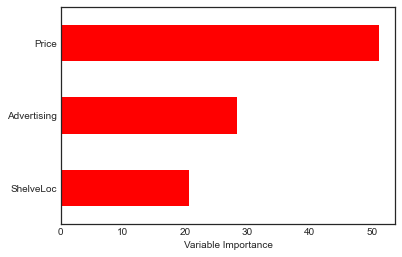

In [24]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [25]:
mean_squared_error(y_test, regr.predict(X_test))

0.1523202394813179